In [2]:
print("Prashant Bankar.\nRoll No.:TACO22153")

Prashant Bankar.
Roll No.:TACO22153


In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv(r"C:\Users\hp\LP-2 PRACTICALS\hr_dashboard_data.csv")

In [4]:
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [5]:
data_cleaned = df.drop(columns=["Name", "Department", "Position", "Joining Date"])
df

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
...,...,...,...,...,...,...,...,...,...,...,...
195,Stephanie Fisher,29,Female,9,32,87,3.5,HR,Junior Developer,Jan-19,50051
196,Jeremy Miller,26,Male,7,45,28,2.8,IT,Junior Developer,Jan-21,46612
197,Daniel Pierce,22,Male,3,36,77,1.6,Finance,Intern,Jan-21,32992
198,Michael Hernandez,36,Female,23,96,50,3.4,Marketing,Manager,Jan-05,104216


In [6]:
# Encode categorical feature: Gender
le_gender = LabelEncoder()
data_cleaned['Gender'] = le_gender.fit_transform(data_cleaned['Gender'])  


In [7]:
data_cleaned['High_Performer'] = ((data_cleaned['Productivity (%)'] >= 75) & 
                                  (data_cleaned['Satisfaction Rate (%)'] >= 80)).astype(int)


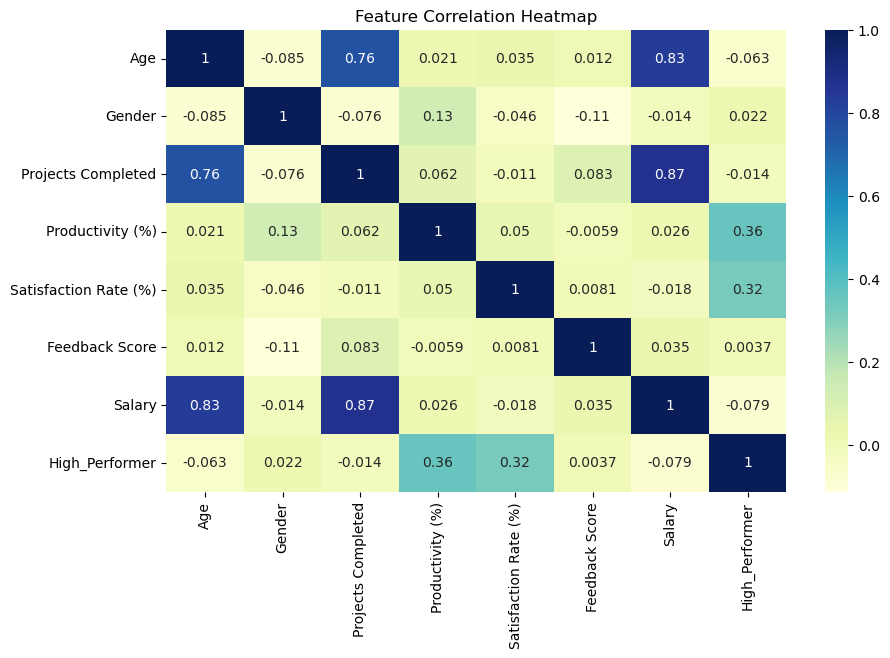

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


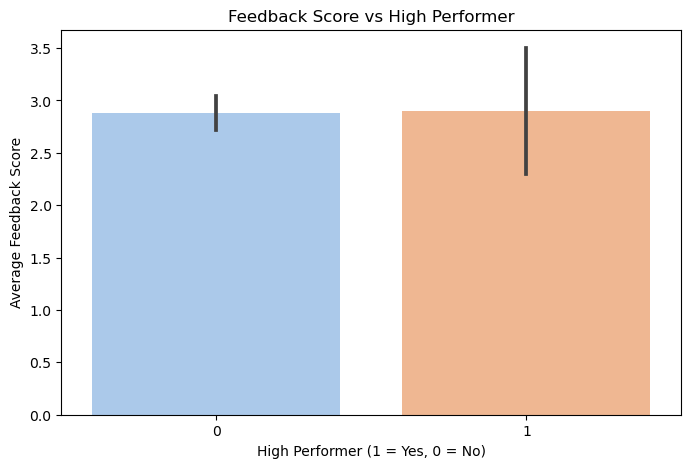

In [9]:

plt.figure(figsize=(8, 5))
sns.barplot(x="High_Performer", y="Feedback Score", data=data_cleaned, palette="pastel")
plt.title("Feedback Score vs High Performer")
plt.xlabel("High Performer (1 = Yes, 0 = No)")
plt.ylabel("Average Feedback Score")
plt.show()


In [10]:
# Define Features and Target
features = ['Age', 'Gender', 'Projects Completed', 'Productivity (%)',
            'Satisfaction Rate (%)', 'Feedback Score', 'Salary']
target = 'High_Performer'

X = data_cleaned[features]
y = data_cleaned[target]



In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [12]:
# Train Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=4, random_state=123)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=123)

In [13]:
# Evaluate the model
y_pred = tree_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



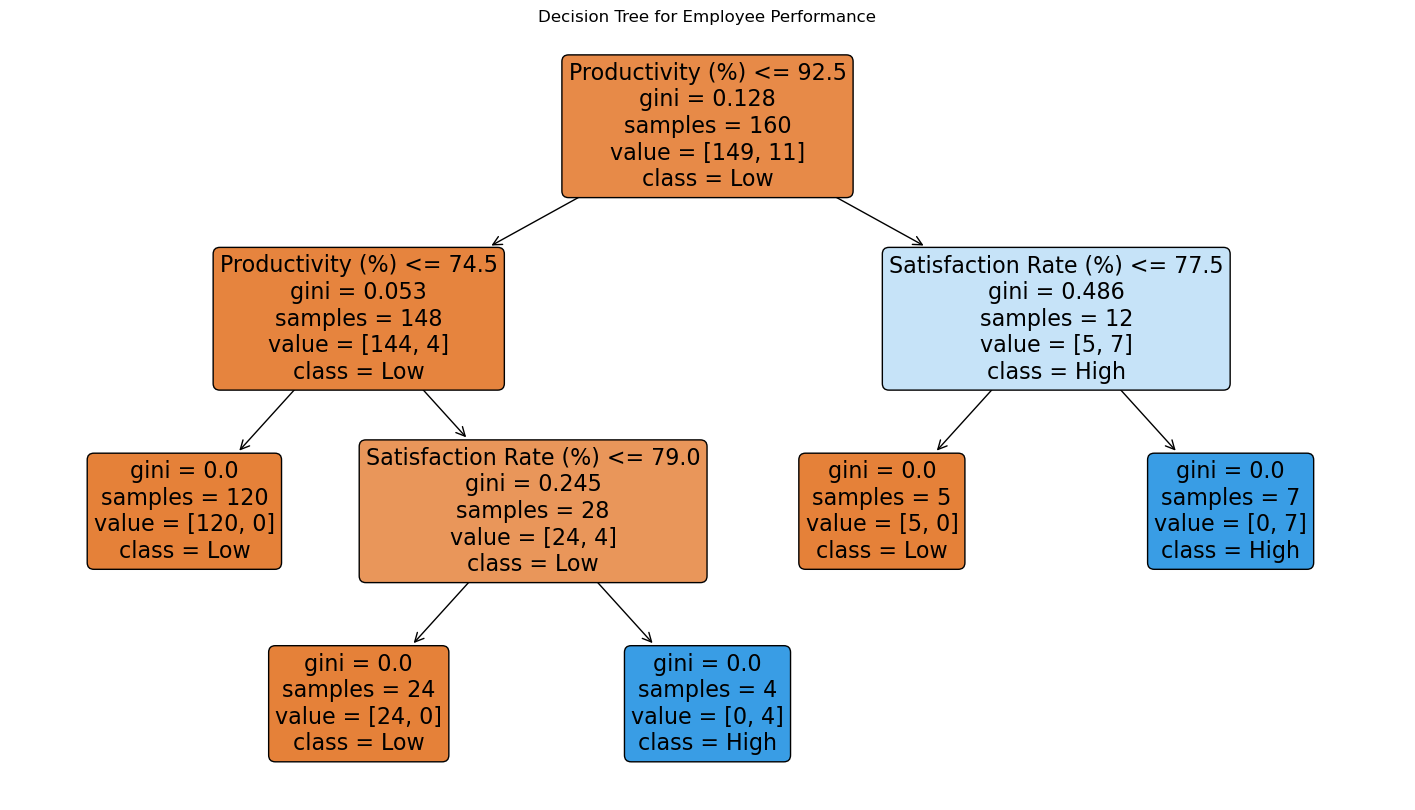

In [14]:
# Visualize the Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(tree_model, feature_names=features, class_names=["Low", "High"], filled=True, rounded=True)
plt.title("Decision Tree for Employee Performance")
plt.show()


In [20]:
# # Predict custom sample
# sample_employee = [[28, 1, 7, 88, 85, 4.5, 55000]]  # Age, Gender, Projects, Productivity, Satisfaction, Feedback, Salary
# sample_prediction = tree_model.predict(sample_employee)
# print("Prediction for Sample Employee (High Performer = 1):", sample_prediction[0])


In [19]:



all_predictions = tree_model.predict(X)


data_cleaned['Predicted_High_Performer'] = all_predictions


print(data_cleaned[['Age', 'Gender', 'Projects Completed', 'Productivity (%)',
                     'Satisfaction Rate (%)', 'Feedback Score', 'Salary', 'Predicted_High_Performer']].head())


   Age  Gender  Projects Completed  Productivity (%)  Satisfaction Rate (%)  \
0   25       1                  11                57                     25   
1   59       0                  19                55                     76   
2   30       1                   8                87                     10   
3   26       0                   1                53                      4   
4   43       1                  14                 3                      9   

   Feedback Score  Salary  Predicted_High_Performer  
0             4.7   63596                         0  
1             2.8  112540                         0  
2             2.4   66292                         0  
3             1.4   38303                         0  
4             4.5  101133                         0  


In [18]:
high_performers = data_cleaned[data_cleaned['Predicted_High_Performer'] == 1]

print(high_performers[['Age', 'Gender', 'Projects Completed', 'Productivity (%)',
                       'Satisfaction Rate (%)', 'Feedback Score', 'Salary', 'Predicted_High_Performer']])

     Age  Gender  Projects Completed  Productivity (%)  Satisfaction Rate (%)  \
30    29       1                   5                93                     94   
32    26       1                  10                95                    100   
38    42       0                  23                77                     80   
60    30       1                   8                75                     88   
83    49       0                  24                76                     87   
94    30       0                   9                94                     81   
113   24       1                   3                93                     82   
148   30       0                   9                96                     81   
160   39       1                  18                98                     98   
168   29       0                   9                96                     85   
171   25       1                   4                86                     94   

     Feedback Score  Salary